# 카이제곱 검정(교차분석)

In [1]:
# 필요한 패키지 설치

import scipy.stats
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/smoker
# df = pd.read_csv("../resource/W4/smoker.csv") # MS Windows용 코드 (자신의 PC 경로에 맞게 수정하시오)
df = pd.read_csv("/content/drive/MyDrive/DA2025_W4/smoker.csv") # Colab용 코드(자신의 구글 드라이브 경로에 맞게 수정하시오)

# 데이터 샘플 확인
df.head()

,sex,smoke
0,male,Non-Smoker
1,male,Smoker
2,male,Non-Smoker
3,male,Smoker
4,male,Non-Smoker


In [4]:
# 항목 별 집계

df.groupby(['sex','smoke'])['smoke'].count()

sex     smoke     
female  Non-Smoker    50
        Smoker        12
male    Non-Smoker    40
        Smoker        29
Name: smoke, dtype: int64

In [5]:
# 카이제곱 검정용 데이터셋 가공

crosstab = pd.crosstab(df.sex, df.smoke)
crosstab

smoke,Non-Smoker,Smoker
sex,,
female,50,12
male,40,29


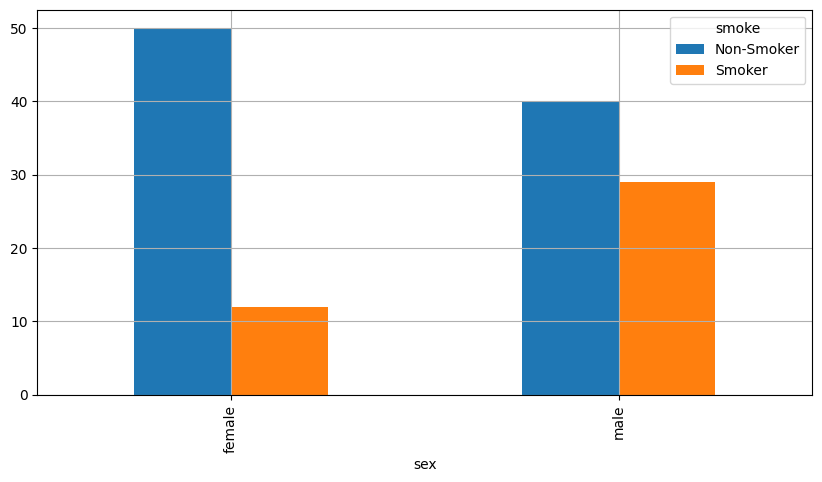

In [6]:
# 성별 별 흡연자 수 시각화

%matplotlib inline
crosstab.plot(kind='bar', figsize=(10,5))
plt.grid()

In [9]:
# 카이제곱 검정

chiresult = chi2_contingency(crosstab, correction=False)
print(f'Chi square: {chiresult[0]}')
print(f'P-value: {chiresult[1]}')

Chi square: 7.8081404703715105
P-value: 0.005201139711454792


In [8]:
print(chiresult)

Chi2ContingencyResult(statistic=np.float64(7.8081404703715105), pvalue=np.float64(0.005201139711454792), dof=1, expected_freq=array([[42.59541985, 19.40458015],
       [47.40458015, 21.59541985]]))


#### 카이제곱 검증 결과 해석

- 유의수준 알파 = 0.05
- P-value 0.0052 < 유의수준 0.05

  ==> 대립가설 채택(귀무가설 기각)

  ==> 성별이 흡연 여부와 상관성이 있다.